# ***Importing Dataset***

*Here we are importing the Pandas, Numpy and Sklearn library in Colab, then we upload the dataset in colab, copy the path and open that csv file.*

In [1]:
import pandas as pd
import numpy as np
import sklearn

dataset=pd.read_csv('/content/mushroom edibility classification dataset.csv')
dataset.head()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,poisonous,5.0,2,4.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,1,edible,5.0,2,9.0,bruises is there,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,2,edible,0.0,2,8.0,bruises is there,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,3,poisonous,5.0,3,8.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
4,4,edible,5.0,2,3.0,no bruises,5,1,3,2,2,7,7,0,2,1,0,3,0,1


# ***Pre-Processing Steps***

**Handelling Missing Values**

*Here we will find out the number of null values in the dataset, then replace the null values with mean value.*

In [2]:
dataset.shape

(3124, 20)

In [3]:
dataset.isnull().sum()

Unnamed: 0                  0
class                       0
cap-shape                   8
cap-surface                 0
cap-color                   8
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan,strategy='mean')
impute.fit(dataset[['cap-shape']])
dataset['cap-shape']=impute.transform(dataset[['cap-shape']])

In [5]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan,strategy='mean')
impute.fit(dataset[['cap-color']])
dataset['cap-color']=impute.transform(dataset[['cap-color']])

In [6]:
dataset.isnull().sum()

Unnamed: 0                  0
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

 ***Encoding Categorical Features*** 


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3124 non-null   int64  
 1   class                     3124 non-null   object 
 2   cap-shape                 3124 non-null   float64
 3   cap-surface               3124 non-null   int64  
 4   cap-color                 3124 non-null   float64
 5   bruises                   3124 non-null   object 
 6   odor                      3124 non-null   int64  
 7   stalk-shape               3124 non-null   int64  
 8   stalk-root                3124 non-null   int64  
 9   stalk-surface-above-ring  3124 non-null   int64  
 10  stalk-surface-below-ring  3124 non-null   int64  
 11  stalk-color-above-ring    3124 non-null   int64  
 12  stalk-color-below-ring    3124 non-null   int64  
 13  veil-type                 3124 non-null   int64  
 14  veil-col

In [8]:
dataset['bruises'].unique()

array(['bruises is there', 'no bruises'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()

dataset['bruises']=enc.fit_transform(dataset['bruises'])

print(dataset[['bruises']].head())

   bruises
0        0
1        0
2        0
3        0
4        1


In [10]:
x=dataset.drop('class',1)

In [11]:
dataset.reset_index(drop=True, inplace=True)

In [12]:
x.keys()

Index(['Unnamed: 0', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [13]:
y=dataset['class']

In [14]:
y

0       poisonous
1          edible
2          edible
3       poisonous
4          edible
          ...    
3119    poisonous
3120       edible
3121       edible
3122    poisonous
3123       edible
Name: class, Length: 3124, dtype: object

In [15]:
dataset['class']=enc.fit_transform(dataset['class'])

In [16]:
x.keys()

Index(['Unnamed: 0', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# ***Data Visualization***

In [17]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [18]:
dataset_df= pd.DataFrame(scaler.fit_transform(x), columns=[ '0', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b6a34afd0>,
      dtype=object)

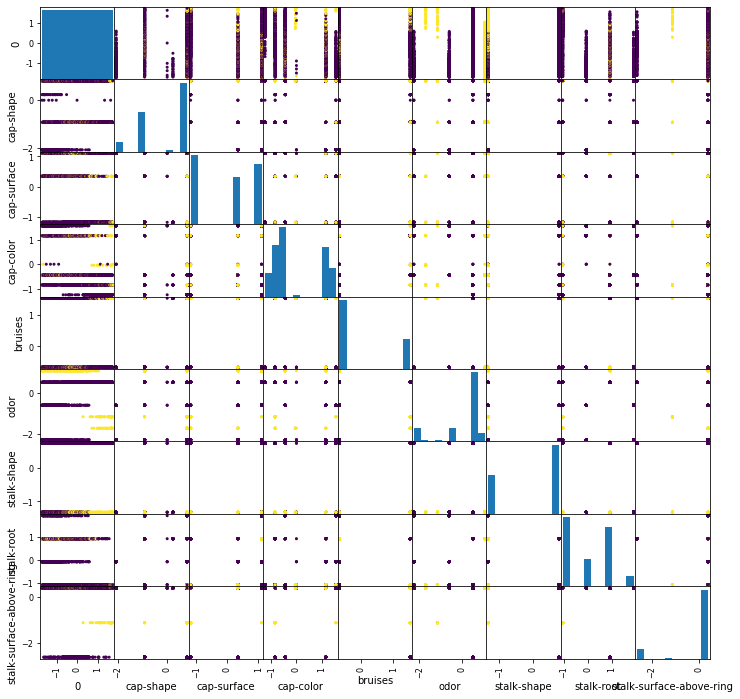

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset_df[[ '0', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring']] ,c=dataset['class'], figsize=(12,12), alpha=1)

# ***Data Split in 8:2***

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(dataset_df, y, stratify=y, test_size=0.2)

In [21]:
print("Training set: x->{} , y->{} \n Testing set: x->{} , y->{}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Training set: x->(2499, 19) , y->(2499,) 
 Testing set: x->(625, 19) , y->(625,)


# ***SVC-Support Vector Machine Algorithm***

In [22]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [23]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))
a1st=svc.score(x_test, y_test)

Training accuracy of the model is 1.00
Testing accuracy of the model is 1.00


In [24]:
predictions = svc.predict(x_test)
print(predictions)

['edible' 'edible' 'edible' 'poisonous' 'edible' 'poisonous' 'poisonous'
 'edible' 'edible' 'edible' 'poisonous' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'poisonous' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'poisonous' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'poisonous' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'poisonous' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'poisonous' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'poisonous' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'poisonous' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'poisonous' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edi

# ***MLP-Multilayer Perceptron***

In [25]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [26]:
nnc.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [27]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))
a2nd=nnc.score(x_test, y_test)

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 1.00


In [28]:
predictions = nnc.predict(x_test)
print(predictions)

['edible' 'edible' 'edible' 'poisonous' 'edible' 'poisonous' 'poisonous'
 'edible' 'edible' 'edible' 'poisonous' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'poisonous' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'poisonous' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'poisonous' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'poisonous' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'poisonous' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'poisonous' 'edible' 'edible' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'poisonous' 'edible' 'edible' 'edible' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edible' 'poisonous' 'edible'
 'edible' 'edible' 'edible' 'edible' 'edi

# ***Random Forest***

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [30]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))
a3rd=rfc.score(x_test, y_test)

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 1.00


In [31]:
predictions = rfc.predict(x_test)

# ***PCA-Principal Component Analysis***

In [32]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=10)

In [33]:
principal_components= pca.fit_transform(x)
print(principal_components)

[[-1.56149644e+03  1.76597731e+00 -4.68952668e+00 ...  6.92147422e-01
   1.76978914e-02 -1.10750233e+00]
 [-1.56050630e+03 -2.53789131e+00  3.36485897e-01 ... -2.91069372e-01
   5.92429666e-02 -7.55567055e-01]
 [-1.55950559e+03 -1.27576117e+00  6.03474394e-01 ...  5.03751273e-01
   1.83246394e-02 -1.09047131e+00]
 ...
 [ 1.55950308e+03 -1.89577613e+00  5.22725689e-01 ...  9.43235800e-01
  -2.89316553e+00  5.61307917e-01]
 [ 1.56050655e+03 -1.36465895e+00 -3.46966888e-01 ...  2.61481261e+00
   2.98724691e+00  1.53909403e+00]
 [ 1.56150530e+03 -9.26861942e-01 -7.58665208e-01 ...  1.16332924e+00
   2.78414399e+00 -3.31760635e-01]]


In [34]:
pca.explained_variance_ratio_

array([9.99971192e-01, 7.42137877e-06, 6.33012329e-06, 3.30338945e-06,
       2.63321830e-06, 1.98995734e-06, 1.71463568e-06, 1.61422061e-06,
       1.44762165e-06, 8.65746659e-07])

In [35]:
sum(pca.explained_variance_ratio_)

0.9999985124677971

In [36]:
principal_df = pd.DataFrame(data=principal_components, columns=["principle component 1", "principle component 2","principle component 3", "principle component 4","principle component 5","principle component 6","principle component 7","principle component 8","principle component 9","principle component 10"])
#principal_df.head()
main_df=pd.concat([principal_df, y], axis=1)

In [37]:
main_df.head()

,principle component 1,principle component 2,principle component 3,principle component 4,principle component 5,principle component 6,principle component 7,principle component 8,principle component 9,principle component 10,class
0,-1561.496436,1.765977,-4.689527,0.152957,2.936033,-0.525821,0.754118,0.692147,0.017698,-1.107502,poisonous
1,-1560.506304,-2.537891,0.336486,-2.650995,-2.015755,0.773825,-0.047243,-0.291069,0.059243,-0.755567,edible
2,-1559.505595,-1.275761,0.603474,2.928867,-0.352857,-0.698056,-0.078374,0.503751,0.018325,-1.090471,edible
3,-1558.503228,0.014341,-1.808347,-1.015676,3.476735,-2.277771,0.386440,1.405756,-0.029994,-0.612785,poisonous
4,-1557.494234,5.439791,-2.884255,-0.953389,-1.224453,1.178007,-1.422011,1.114613,0.016707,-1.042172,edible


In [38]:
Z=main_df.dropna()
X= Z.drop("class" , axis=1)
y= Z["class"]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state=42)

In [40]:
print("Training set: x->{} , y->{} \n Testing set: x->{} , y->{}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Training set: x->(2499, 10) , y->(2499,) 
 Testing set: x->(625, 10) , y->(625,)


# ***SVC,MLP and RF on reduced Dataset***

**SVC**

In [41]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [42]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))
a4th=svc.score(x_test, y_test)

Training accuracy of the model is 0.95
Testing accuracy of the model is 0.96


**MLP**

In [43]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [44]:
nnc.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [45]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))
a5th=nnc.score(x_test, y_test)

The Training accuracy of the model is 0.99
The Testing accuracy of the model is 0.99


**Random Forest** 

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [47]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))
a6th=rfc.score(x_test, y_test)

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 1.00


# ***Comparing Results***

No handles with labels found to put in legend.


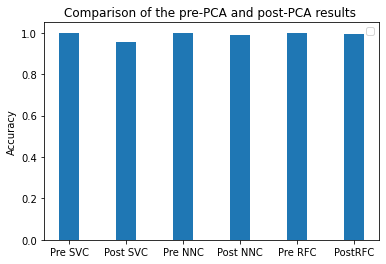

In [48]:
import matplotlib.pyplot as plt
labels = ['Pre SVC','Post SVC', 'Pre NNC','Post NNC',"Pre RFC","PostRFC"]
men_means = [a1st,a4th,a2nd,a5th,a3rd,a6th]

width = .35 

fig, ax = plt.subplots()

ax.bar(labels, men_means, width)

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of the pre-PCA and post-PCA results ')
ax.legend()

plt.show()